In [4]:
from numba import njit
import random
from itertools import accumulate
import pandas as pd
import matplotlib
import plotly.express as px
from scipy.stats import normaltest
from math import floor
import numpy as np

In [2]:
def getData(data_size, walk_size, f):
    l = lambda i : f(walk_size)
    walks = np.fromfunction(np.vectorize(l), (data_size,), dtype=int)
    return pd.DataFrame({'walks':walks})

## Simple Walk
Generate 100000 [-1, 1] random walks of length 10000

In [71]:
@njit
def genWalkSumChoice(walkLen):
    walk = np.random.rand(walkLen)
    neg = walk < 0.5
    walk[neg] = -1
    walk[np.invert(neg)] = 1
    return int(walk.sum())

In [72]:
bin_df = getData(100000, 10000, genWalkSumChoice)

<AxesSubplot:ylabel='Frequency'>

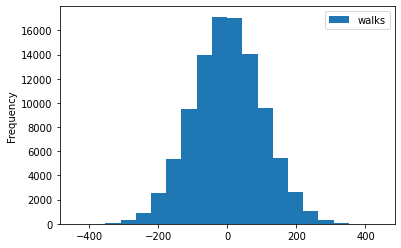

In [74]:
bin_df.plot.hist(bins=20)

In [75]:
statistic, p = normaltest(bin_df['walks'])
statistic, p

(2.585544566431844, 0.2745087113453905)

## Walk with gaussian step
Instead of a [-1, 1] step, generate a gaussian and use for the step

In [92]:
@njit
def genWalkSumGaussian(walkLen):
    return np.random.normal(0, 5, walkLen).sum()

In [93]:
gauss_df = getData(100000, 10000, genWalkSumGaussian)

<AxesSubplot:ylabel='Frequency'>

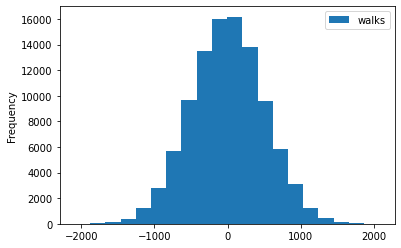

In [94]:
gauss_df.plot.hist(bins=20)

In [99]:
statistic, p = normaltest(gauss_df['walks'])
statistic, p

(0.880059383134197, 0.6440172989164159)

In [95]:
pos = gauss_df[gauss_df['walks'] > 0]

<AxesSubplot:ylabel='Frequency'>

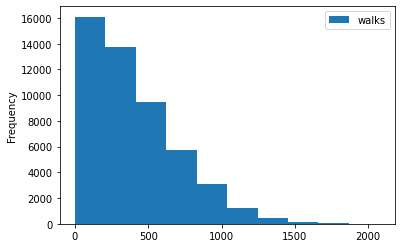

In [96]:
pos.plot.hist()

In [97]:
def paretoRatiosForPercentile(df, perc):
    n = 3
    df = df.sort_values('walks', ascending=False)
    descent_size = df.size
    sums = []
    sizes = []
    for i in range(n + 1):
        sums.append(df.head(n=descent_size)['walks'].sum())
        sizes.append(descent_size)
        descent_size  = floor(descent_size * perc)
    return [sums[i+1] / sums[i] for i in range(n)]

In [98]:
for perc in np.arange(0.05, 0.5, 0.01):
    perc = round(perc, 2)
    print(perc, paretoRatiosForPercentile(pos, perc))

0.05 [0.14648434382749814, 0.07076929514497875, 0.05711735166096258]
0.06 [0.17063168988319152, 0.08483724415963714, 0.06654716012171295]
0.07 [0.19387017317274347, 0.0987955490391424, 0.08322918622920465]
0.08 [0.2162715976153444, 0.11274457289124992, 0.09399066535463099]
0.09 [0.23799792046381413, 0.12656857927908266, 0.10727527773741616]
0.1 [0.25907647239231607, 0.14027935616744974, 0.12130315866749787]
0.11 [0.27952941054577685, 0.1539231878232287, 0.13304321537329836]
0.12 [0.29942700203681644, 0.16753938375436356, 0.1461329854758623]
0.13 [0.3187541167016799, 0.18122427835616564, 0.15815842764133023]
0.14 [0.33756860081002804, 0.194714132817998, 0.1715855154767433]
0.15 [0.35587185434969526, 0.20821014350097378, 0.1834560059551648]
0.16 [0.3737393784782786, 0.22161905403409196, 0.19586477221847284]
0.17 [0.39117563151462664, 0.23512477213406133, 0.20824673320168594]
0.18 [0.40816415066529166, 0.248482313922273, 0.22062034605249953]
0.19 [0.42479203544309224, 0.26179407949747674,